In [35]:
import numpy as np # linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM,Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam

In [36]:
df = pd.read_csv('stock1.csv')

In [37]:
df.head()

,Price,Date,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05 00:00:00+00:00,32.92603683,56.58751297,61.59376525878906,46.77188491821289,50.51251220703125,855215656
2,1,2007-10-08 00:00:00+00:00,31.240449905395508,53.69063949584961,58.50001525878906,53.35313797,58.50001525878906,126671715
3,2,2007-10-09 00:00:00+00:00,33.367889404296875,57.34688949584961,57.85313797,50.82188797,53.71876144,116725709
4,3,2007-10-10 00:00:00+00:00,33.678829193115234,57.881263732910156,59.06251525878906,57.37501525878906,58.83751297,67931378


In [38]:
df = df.drop(0)

In [39]:
df

,Price,Date,Adj Close,Close,High,Low,Open,Volume
1,0,2007-10-05 00:00:00+00:00,32.92603683,56.58751297,61.59376525878906,46.77188491821289,50.51251220703125,855215656
2,1,2007-10-08 00:00:00+00:00,31.240449905395508,53.69063949584961,58.50001525878906,53.35313797,58.50001525878906,126671715
3,2,2007-10-09 00:00:00+00:00,33.367889404296875,57.34688949584961,57.85313797,50.82188797,53.71876144,116725709
4,3,2007-10-10 00:00:00+00:00,33.678829193115234,57.881263732910156,59.06251525878906,57.37501525878906,58.83751297,67931378
5,4,2007-10-11 00:00:00+00:00,37.44273376464844,64.35001373291016,67.50001525878906,57.37501525878906,67.50001525878906,106320954
...,...,...,...,...,...,...,...,...
4204,4203,2024-10-25 00:00:00+00:00,311.33111572265625,315.79998779296875,321.5,313.25,321.5,12979410
4205,4204,2024-10-28 00:00:00+00:00,313.7957458496094,318.29998779296875,320.45001220703125,310.75,314.5,9610615
4206,4205,2024-10-29 00:00:00+00:00,316.013916,320.54998779296875,321.20001220703125,314.1499938964844,316.1000061035156,15856332
4207,4206,2024-10-30 00:00:00+00:00,313.94366455078125,318.45001220703125,325.3999938964844,316.75,318.54998779296875,14498110


In [40]:
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df.set_index('Date', inplace=True)

In [41]:
df.tail()

,Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2024-10-25,4203,311.33111572265625,315.79998779296875,321.5,313.25,321.5,12979410
2024-10-28,4204,313.7957458496094,318.29998779296875,320.45001220703125,310.75,314.5,9610615
2024-10-29,4205,316.013916,320.54998779296875,321.20001220703125,314.1499938964844,316.1000061035156,15856332
2024-10-30,4206,313.94366455078125,318.45001220703125,325.3999938964844,316.75,318.54998779296875,14498110
2024-10-31,4207,316.2603759765625,320.79998779296875,322.70001220703125,317.8500061035156,320.3999938964844,9900390


In [42]:
#Create  a new dataframe with only the 'Close' column
data = df.filter(['Close'])# We Store Our Open Column

#Converting the dataframe into the numpy array
dataset = data.values

In [43]:
data.head()

,Close
Date,
2007-10-05,56.58751297
2007-10-08,53.69063949584961
2007-10-09,57.34688949584961
2007-10-10,57.881263732910156
2007-10-11,64.35001373291016


In [44]:
dataset

array([['56.58751297'],
       ['53.69063949584961'],
       ['57.34688949584961'],
       ...,
       ['320.54998779296875'],
       ['318.45001220703125'],
       ['320.79998779296875']], dtype=object)

In [45]:
#  Normalizing  the values
scaler = MinMaxScaler(feature_range=(0,1)) # Values from 0 to 1
scaled_data = scaler.fit_transform(dataset)

In [46]:
scaled_data,len(scaled_data)

(array([[0.07199731],
        [0.06329342],
        [0.07427892],
        ...,
        [0.8650942 ],
        [0.85878465],
        [0.86584534]]),
 4208)

In [47]:
x_data = []
y_data = []
for i in range(60,len(scaled_data)):# let consider the 60 days of stock prices
    x_data.append(scaled_data[i-60:i])# when i = 60, scaled_data[0:60] → gives values from index 0 to 59 and so on.
    y_data.append(scaled_data[i])#scaled_data[60] → would be the value you try to predict (often appended to y_data)
x_data,y_data = np.array(x_data), np.array(y_data)

In [48]:
y_data,len(y_data)

(array([[0.14838883],
        [0.15852929],
        [0.15717724],
        ...,
        [0.8650942 ],
        [0.85878465],
        [0.86584534]]),
 4148)

In [49]:
x_data,len(x_data)

(array([[[0.07199731],
         [0.06329342],
         [0.07427892],
         ...,
         [0.14348761],
         [0.14526218],
         [0.14974088]],
 
        [[0.06329342],
         [0.07427892],
         [0.07588449],
         ...,
         [0.14526218],
         [0.14974088],
         [0.14838883]],
 
        [[0.07427892],
         [0.07588449],
         [0.09532038],
         ...,
         [0.14974088],
         [0.14838883],
         [0.15852929]],
 
        ...,
 
        [[0.97836697],
         [0.93194615],
         [0.92578679],
         ...,
         [0.8608878 ],
         [0.85082243],
         [0.85833389]],
 
        [[0.93194615],
         [0.92578679],
         [0.95973853],
         ...,
         [0.85082243],
         [0.85833389],
         [0.8650942 ]],
 
        [[0.92578679],
         [0.95973853],
         [0.93149548],
         ...,
         [0.85833389],
         [0.8650942 ],
         [0.85878465]]]),
 4148)

In [50]:
spliting_len = int(len(x_data)*0.8)
x_train = x_data[:spliting_len]#This selects the first 80% of your input samples (x_data).
x_test = x_data[spliting_len:]#This selects the remaining 20% of the samples.

y_train = y_data[:spliting_len]
y_test = y_data[spliting_len:]

In [51]:
#Convert to the numpy array
x_train,y_train,x_test,y_test = np.array(x_train),np.array(y_train),np.array(x_test),np.array(y_test)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3318, 60, 1)
(830, 60, 1)
(3318, 1)
(830, 1)


**Two LSTM layers with 100 neurons and 1 Dense layers, with 1 neuron.**
**Compile the model using the means squared error (MSE) loss function and the ADAM optimizer.**

In [53]:
model = Sequential()#1st layer
model.add(LSTM(100,input_shape=(x_train.shape[1],1),return_sequences= True))
model.add(LSTM(100))
model.add(Dropout(0.4))
model.add(Dense(1))
ADAM = Adam(0.0005, beta_1=0.9,beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
#fit the model
history = model.fit(x_train,y_train,epochs=2,batch_size=72,validation_data=(x_test,y_test),verbose=2,shuffle=False)

Epoch 1/2
47/47 - 15s - 325ms/step - loss: 8.6398e-04 - val_loss: 0.0075
Epoch 2/2
47/47 - 21s - 453ms/step - loss: 6.6178e-04 - val_loss: 0.0029


In [55]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,905 (1.39 MB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,604 (947.68 KB)

In [56]:
predictions = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [57]:
predictions,len(predictions)

(array([[0.2969771 ],
        [0.29547688],
        [0.29383004],
        [0.29227576],
        [0.29124394],
        [0.29030037],
        [0.28933597],
        [0.2881645 ],
        [0.28713518],
        [0.28612638],
        [0.28538364],
        [0.28487754],
        [0.2844797 ],
        [0.28406805],
        [0.2836415 ],
        [0.283345  ],
        [0.283191  ],
        [0.2834452 ],
        [0.28389022],
        [0.2842729 ],
        [0.2847643 ],
        [0.28527322],
        [0.2857369 ],
        [0.2860674 ],
        [0.28595904],
        [0.2851367 ],
        [0.2843353 ],
        [0.28357342],
        [0.28329244],
        [0.28343898],
        [0.28385523],
        [0.28440195],
        [0.28517243],
        [0.28558847],
        [0.28618997],
        [0.28812662],
        [0.2905548 ],
        [0.2926914 ],
        [0.29480952],
        [0.2964681 ],
        [0.29748878],
        [0.29767814],
        [0.2974202 ],
        [0.29675022],
        [0.29556805],
        [0

In [58]:
inv_pred = scaler.inverse_transform(predictions)

In [59]:
inv_pred,len(inv_pred)

(array([[131.46642 ],
        [130.9671  ],
        [130.41899 ],
        [129.90169 ],
        [129.55827 ],
        [129.24423 ],
        [128.92325 ],
        [128.53336 ],
        [128.19078 ],
        [127.85503 ],
        [127.60782 ],
        [127.43938 ],
        [127.30697 ],
        [127.16996 ],
        [127.02799 ],
        [126.92931 ],
        [126.87805 ],
        [126.96266 ],
        [127.11077 ],
        [127.238144],
        [127.40169 ],
        [127.571075],
        [127.725395],
        [127.835396],
        [127.799324],
        [127.525635],
        [127.2589  ],
        [127.00533 ],
        [126.91182 ],
        [126.960594],
        [127.09913 ],
        [127.28109 ],
        [127.53753 ],
        [127.675995],
        [127.87619 ],
        [128.52075 ],
        [129.3289  ],
        [130.04002 ],
        [130.745   ],
        [131.29701 ],
        [131.63672 ],
        [131.69974 ],
        [131.61389 ],
        [131.3909  ],
        [130.99745 ],
        [1

In [60]:
inv_y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [61]:
inv_y_test,len(inv_y_test)

(array([[130.02191162],
        [129.85314941],
        [130.41564941],
        [132.75003052],
        [130.72503662],
        [129.82502747],
        [128.22190857],
        [129.54377747],
        [128.70002747],
        [129.90940857],
        [130.02191162],
        [129.51565552],
        [128.81253052],
        [128.61566162],
        [129.34690857],
        [129.60003662],
        [131.54064941],
        [131.14691162],
        [130.10627747],
        [131.20315552],
        [131.06253052],
        [130.89378357],
        [130.41564941],
        [128.30627441],
        [125.55000305],
        [128.36250305],
        [128.25      ],
        [130.8374939 ],
        [131.4375    ],
        [131.3999939 ],
        [131.25      ],
        [132.3374939 ],
        [129.44999695],
        [132.26249695],
        [140.25      ],
        [138.5625    ],
        [135.5249939 ],
        [137.4375    ],
        [135.44999695],
        [133.94999695],
        [131.73750305],
        [132.449

In [62]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))


In [63]:
rmse# Our model  predictions deviate from the actual values by an average of only 5.45% in normalized units — which is generally very good.

np.float64(0.05408267204674157)

In [64]:
ploting_data = pd.DataFrame(
    {
        'Original_test_data': inv_y_test.flatten(),
        'Predicted_data': inv_pred.flatten()
    },
    index = df.index[spliting_len + 60:] # Adjusted index start to account for the lookback period
)

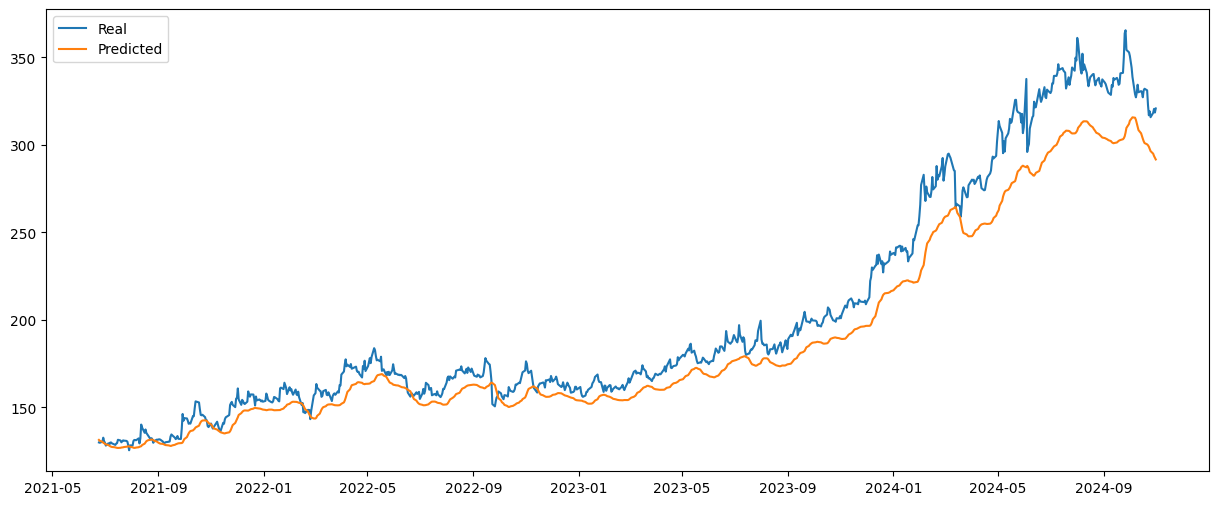

In [65]:
plt.figure(figsize=(15, 6))
plt.plot(ploting_data['Original_test_data'], label='Real')
plt.plot(ploting_data['Predicted_data'], label='Predicted')
plt.legend()
plt.show()

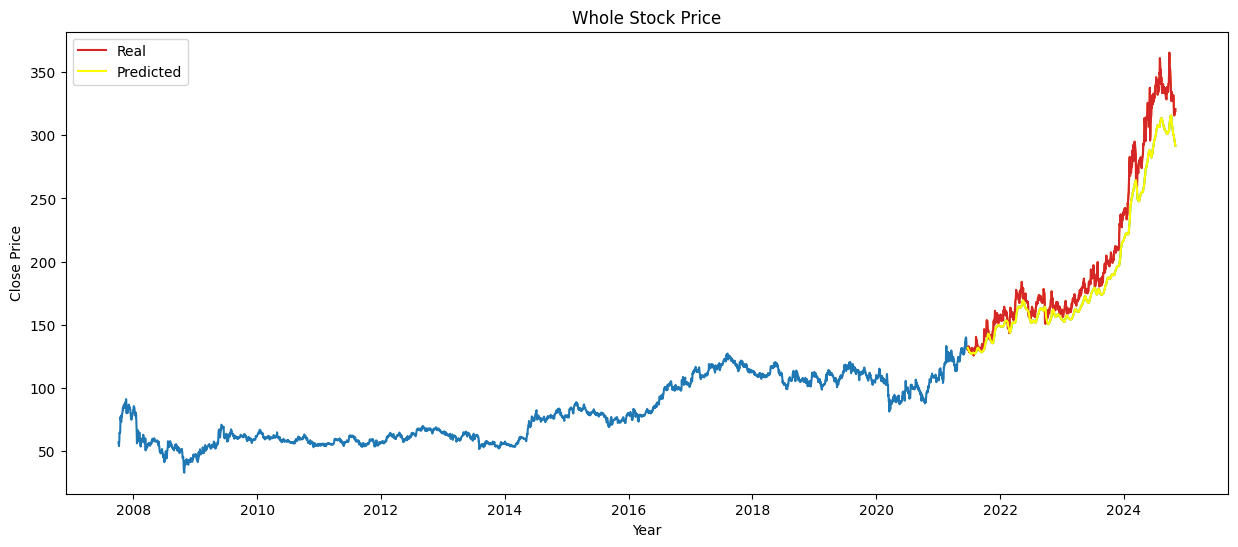

In [66]:
# Convert 'Close' column to numeric, coercing errors
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Create original_close_prices series
original_close_prices = df['Close']

# Concatenate the original closing prices with the ploting_data dataframe
full_series = pd.concat([original_close_prices[:spliting_len + 60], ploting_data], axis=0)

plt.figure(figsize=(15, 6))
plt.plot(full_series)
plt.plot(ploting_data['Original_test_data'], label='Real')
plt.plot(ploting_data['Predicted_data'], label='Predicted',color='yellow')
plt.legend()
plt.title('Whole Stock Price')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.show()

In [75]:
# Predict next 60 days
num_future_days = 60

# Get the last 365 days from the scaled data
last_365_days = scaled_data[-365:]

# Create a list to store future predictions
future_predictions = []

# Use the last 60 days to predict the next day, then append the prediction to the sequence and repeat
current_batch = last_60_days.reshape((1, last_60_days.shape[0], 1))

for i in range(num_future_days):
    # Get the prediction for the next day
    predicted_day_scaled = model.predict(current_batch)[0]

    # Append the prediction to the future_predictions list
    future_predictions.append(predicted_day_scaled)

    # Update the current_batch to include the new prediction and drop the oldest value
    current_batch = np.append(current_batch[:, 1:, :], [[predicted_day_scaled]], axis=1)

# Inverse transform the future predictions to the original scale
future_predictions_original_scale = scaler.inverse_transform(future_predictions)

# Generate future dates starting from the day after the last date in the original data
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_future_days, freq='D')

# Create a DataFrame for future predictions with dates as index
future_predictions_df = pd.DataFrame(future_predictions_original_scale, index=future_dates, columns=['Predicted_Close'])

# Display the future predictions
display(future_predictions_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━

,Predicted_Close
2024-11-01,291.028506
2024-11-02,289.003214
2024-11-03,286.164527
2024-11-04,282.804281
2024-11-05,279.127701
2024-11-06,275.274741
2024-11-07,271.339831
2024-11-08,267.385896
2024-11-09,263.454735
2024-11-10,259.572990


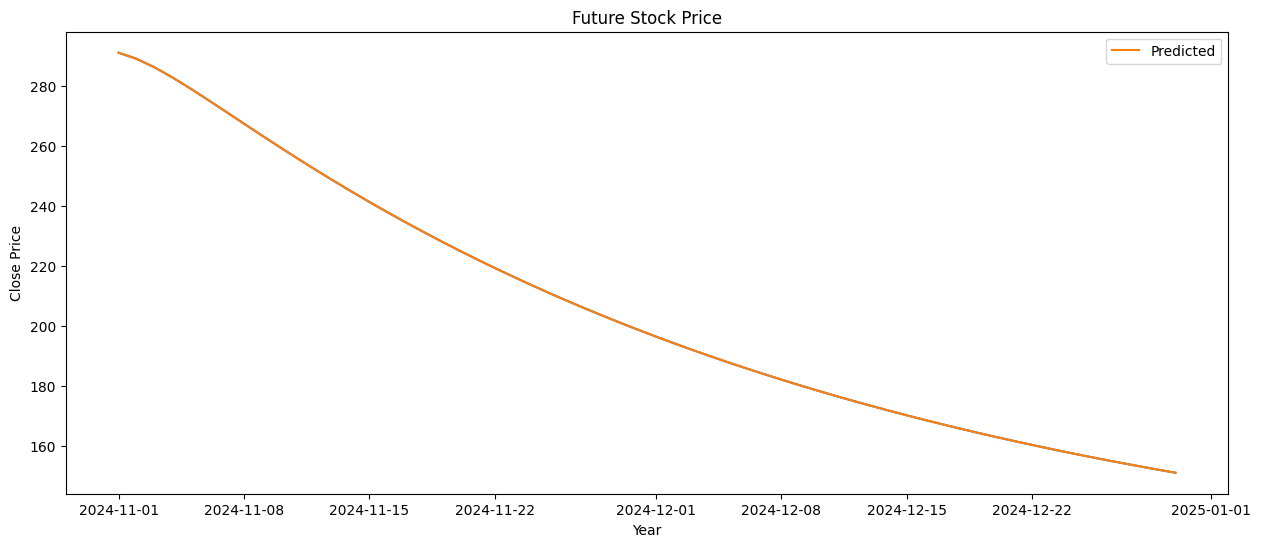

In [76]:
plt.figure(figsize=(15, 6))
plt.plot(future_predictions_df)
plt.plot(future_predictions_df['Predicted_Close'], label='Predicted')
plt.legend()
plt.title('Future Stock Price')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.show()